In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
df = pd.read_csv("Crash_Data.csv", low_memory=False)
df.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


In [41]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52843 entries, 0 to 52842
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       52843 non-null  int64 
 1   State                          52843 non-null  object
 2   Month                          52843 non-null  int64 
 3   Year                           52843 non-null  int64 
 4   Dayweek                        52843 non-null  object
 5   Time                           52803 non-null  object
 6   Crash Type                     52843 non-null  object
 7   Bus Involvement                52821 non-null  object
 8   Heavy Rigid Truck Involvement  32328 non-null  object
 9   Articulated Truck Involvement  52821 non-null  object
 10  Speed Limit                    52141 non-null  object
 11  Road User                      52843 non-null  object
 12  Gender                         52816 non-null  object
 13  A

In [42]:
print(df.isnull().sum())

Crash ID                             0
State                                0
Month                                0
Year                                 0
Dayweek                              0
Time                                40
Crash Type                           0
Bus Involvement                     22
Heavy Rigid Truck Involvement    20515
Articulated Truck Involvement       22
Speed Limit                        702
Road User                            0
Gender                              27
Age                                  0
National Remoteness Areas        45965
SA4 Name 2016                    45951
National LGA Name 2017           45950
National Road Type               45966
Christmas Period                     0
Easter Period                        0
Age Group                           90
Day of week                          0
Time of day                          0
dtype: int64


In [43]:
print(df.columns.tolist())

['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type', 'Bus Involvement', 'Heavy Rigid Truck Involvement', 'Articulated Truck Involvement', 'Speed Limit', 'Road User', 'Gender', 'Age', 'National Remoteness Areas', 'SA4 Name 2016', 'National LGA Name 2017', 'National Road Type', 'Christmas Period', 'Easter Period', 'Age Group', 'Day of week', 'Time of day']


In [44]:
# Drop rows where essential columns like Crash Type or Time are missing
df = df.dropna(subset=['Crash Type', 'Time']).copy()

# Fill missing values in important categorical columns
df.loc[:, 'Road User'] = df['Road User'].fillna('Unknown')
df.loc[:, 'Gender'] = df['Gender'].fillna('Unknown')
df.loc[:, 'Age Group'] = df['Age Group'].fillna('Unknown')
df.loc[:, 'Time of day'] = df['Time of day'].fillna('Unknown')


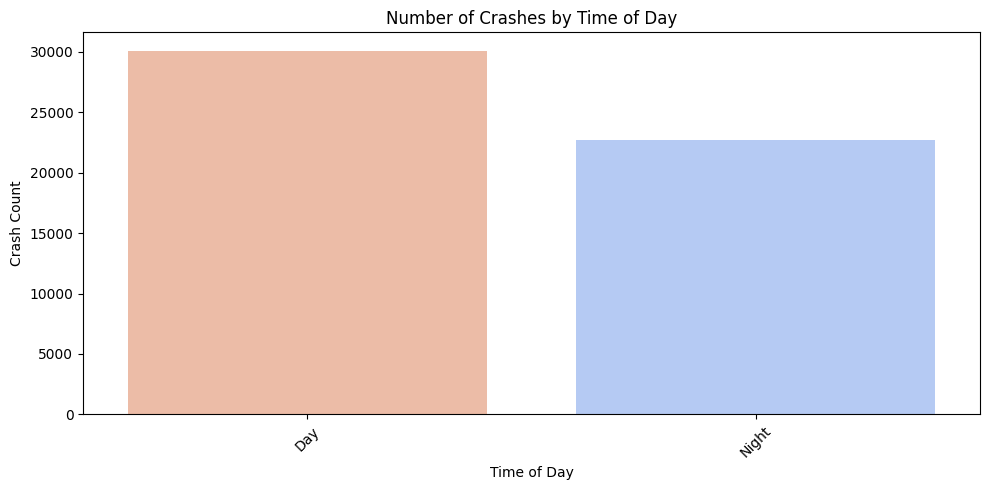

In [45]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Time of day', hue='Time of day', order=df['Time of day'].value_counts().index, palette='coolwarm', legend=False)
plt.title("Number of Crashes by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Crash Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



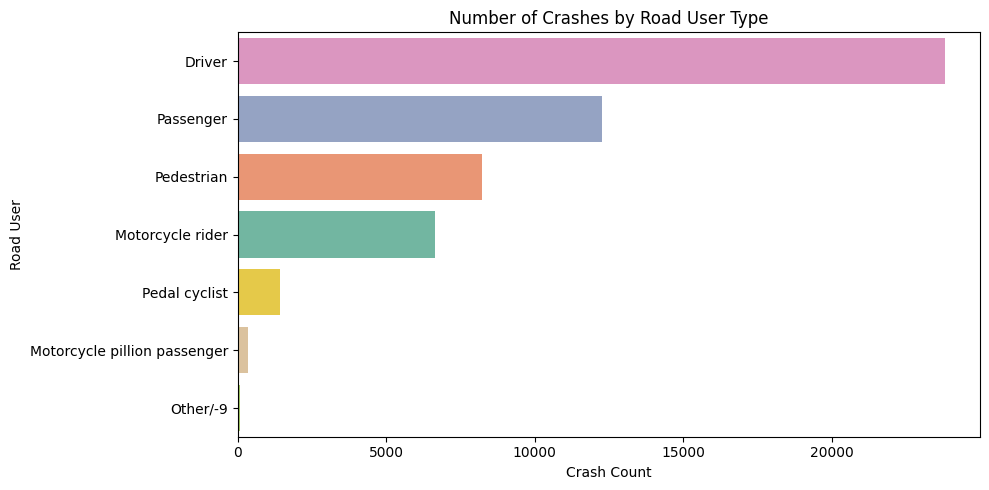

In [46]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Road User', hue='Road User',
order=df['Road User'].value_counts().index,
palette='Set2', legend=False)
plt.title("Number of Crashes by Road User Type")
plt.xlabel("Crash Count")
plt.ylabel("Road User")
plt.tight_layout()
plt.show()


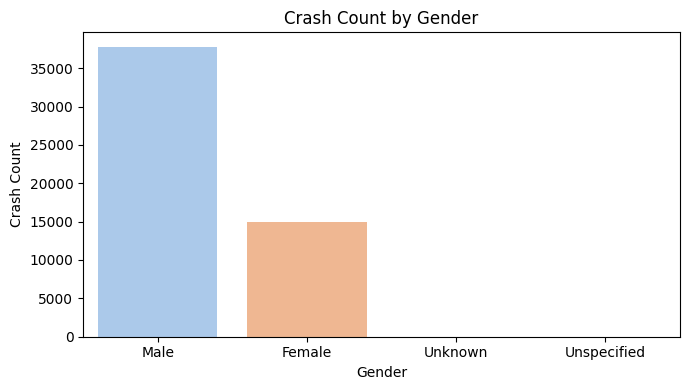

In [47]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Gender', hue='Gender', palette='pastel', legend=False)
plt.title("Crash Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Crash Count")
plt.tight_layout()
plt.show()


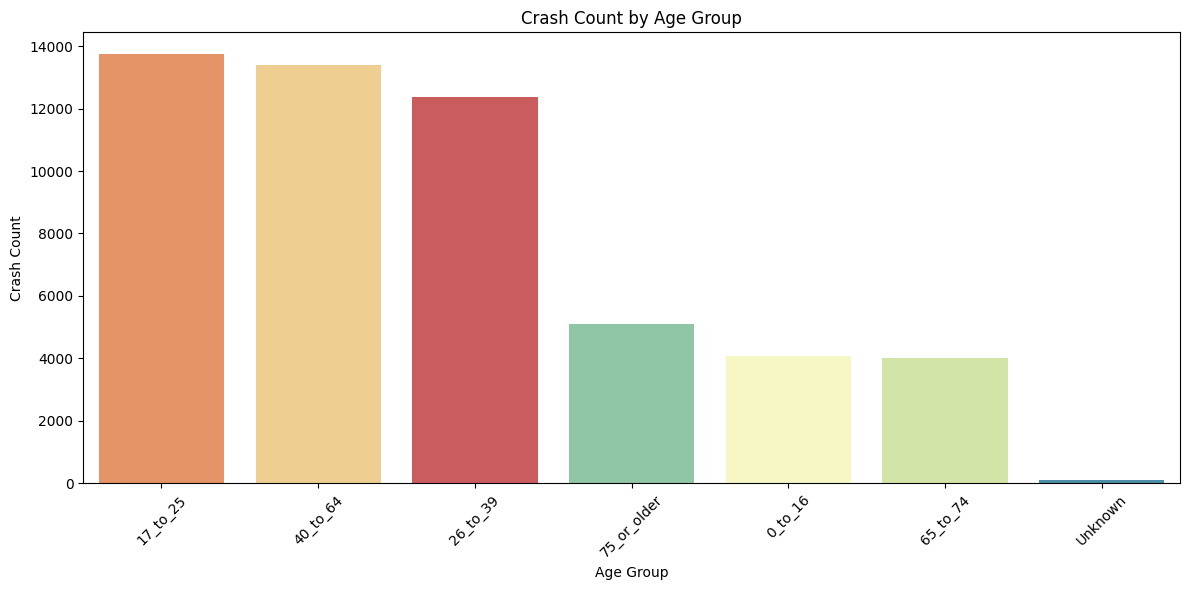

In [48]:
#crash count vs Age group
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age Group', hue='Age Group', 
order=df['Age Group'].value_counts().index, 
palette='Spectral', legend=False)
plt.title("Crash Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Crash Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


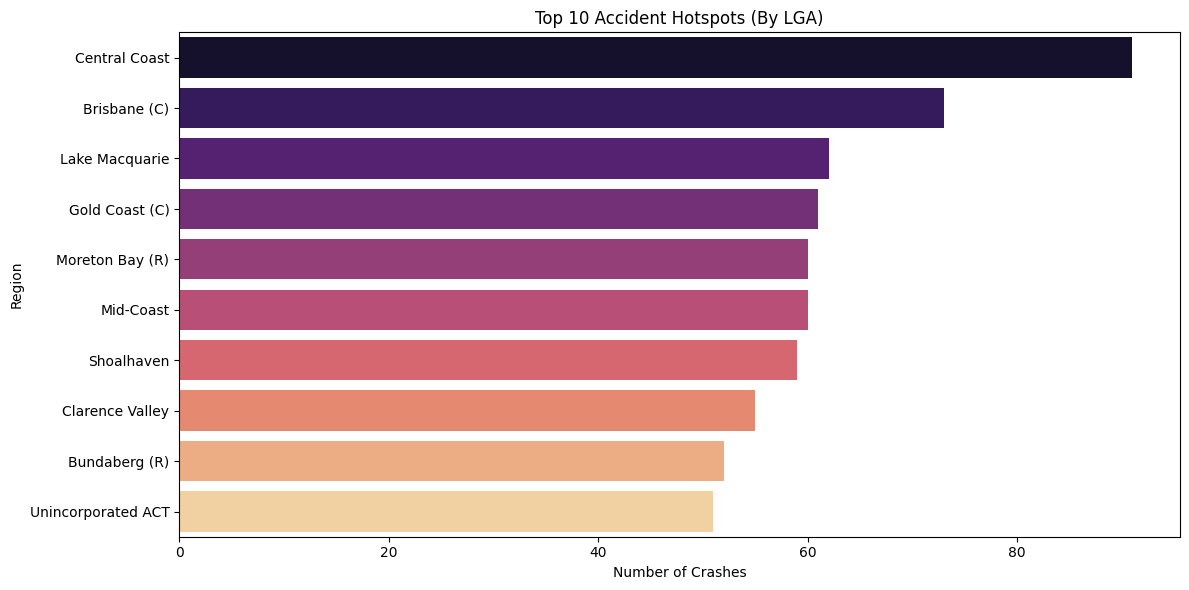

In [49]:
# Get top 10 LGA crash counts
top_regions = df['National LGA Name 2017'].value_counts().nlargest(10)
top_df = pd.DataFrame({'Region': top_regions.index, 'Crashes': top_regions.values})
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_df, x='Crashes', y='Region', hue='Region', palette='magma', legend=False)
plt.title("Top 10 Accident Hotspots (By LGA)")
plt.xlabel("Number of Crashes")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


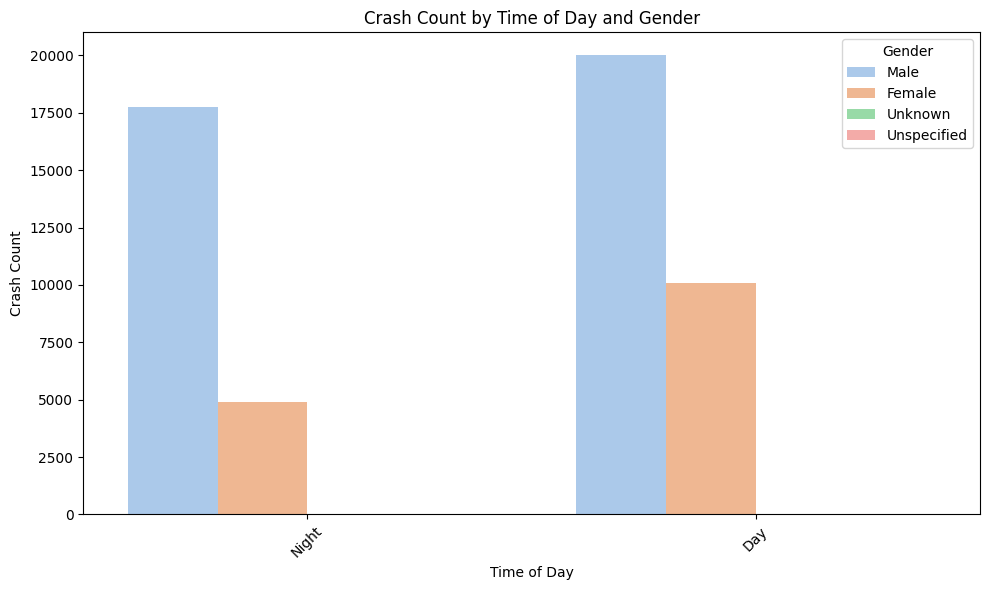

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Time of day', hue='Gender', palette='pastel')
plt.title("Crash Count by Time of Day and Gender")
plt.xlabel("Time of Day")
plt.ylabel("Crash Count")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


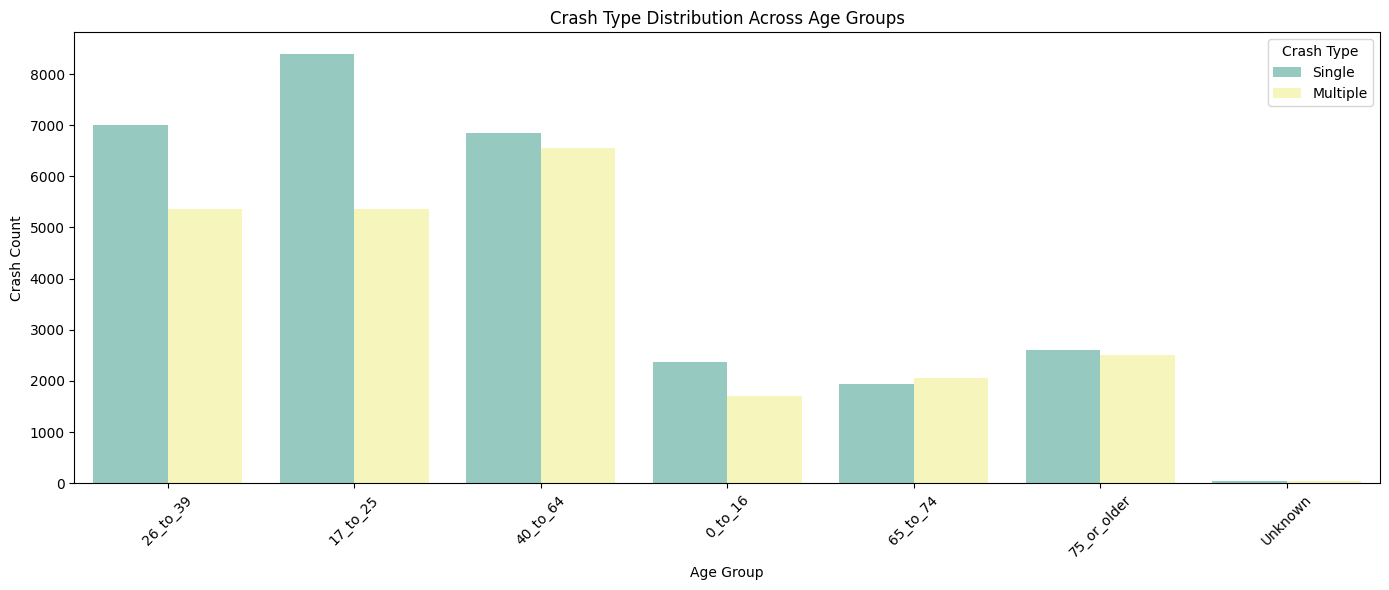

In [51]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Age Group', hue='Crash Type', palette='Set3')
plt.title("Crash Type Distribution Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Crash Count")
plt.xticks(rotation=45)
plt.legend(title="Crash Type")
plt.tight_layout()
plt.show()


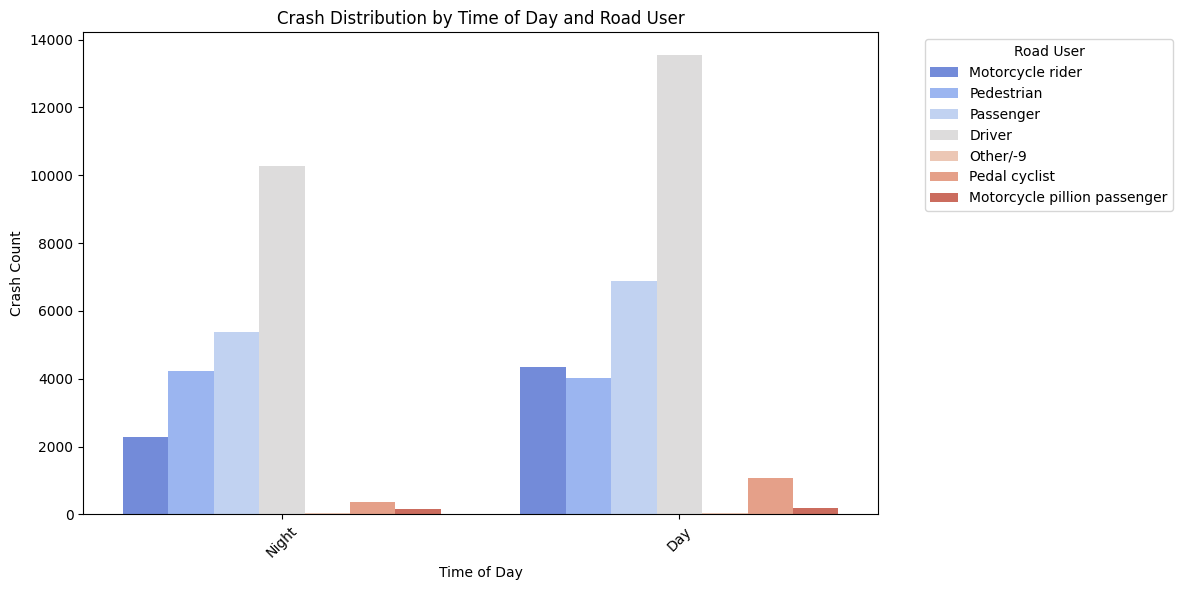

In [52]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Time of day', hue='Road User', palette='coolwarm')
plt.title("Crash Distribution by Time of Day and Road User")
plt.xlabel("Time of Day")
plt.ylabel("Crash Count")
plt.xticks(rotation=45)
plt.legend(title="Road User", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


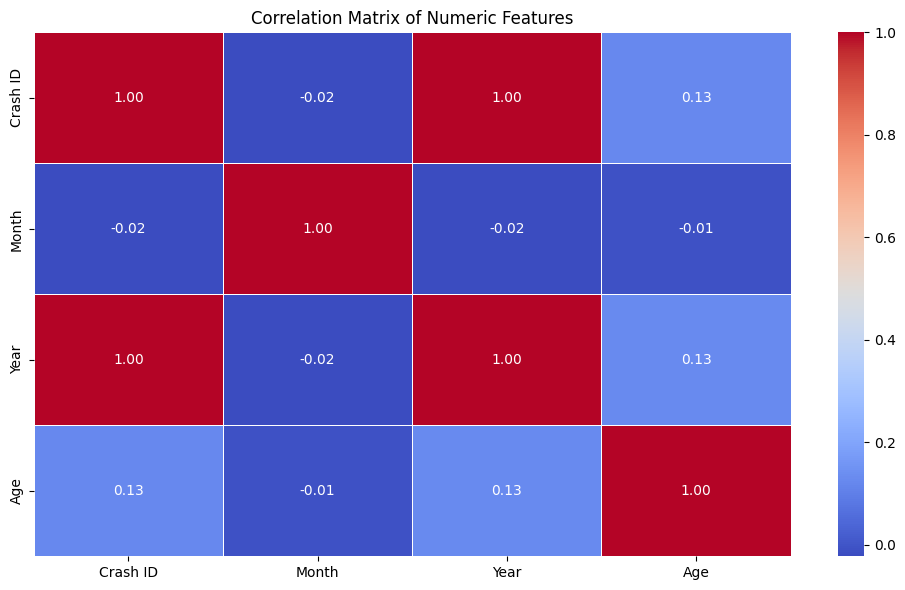

In [53]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()
